In [25]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [33]:
BASE_DIR = "/home/admin1/Downloads/new_images"
TRAIN_DIR = os.path.join(BASE_DIR, "train")
VAL_DIR = os.path.join(BASE_DIR, "validation")

print("Train folder:", TRAIN_DIR)
print("Validation folder:", VAL_DIR)

Train folder: /home/admin1/Downloads/new_images/train
Validation folder: /home/admin1/Downloads/new_images/validation


In [35]:
IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 15

In [37]:
BASE_DIR = "/home/admin1/Downloads/new_images"
TRAIN_DIR = os.path.join(BASE_DIR, "train")
VAL_DIR = os.path.join(BASE_DIR, "validation")

train_data = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_data = val_datagen.flow_from_directory(
    VAL_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

/home/admin1/anaconda3/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2026-01-06 16:04:31.899727: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
EPOCHS = 15  # You can increase later

history = model.fit(
    train_data,
    epochs=EPOCHS,
    validation_data=val_data
)

/home/admin1/anaconda3/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 513ms/step - accuracy: 0.5022 - loss: 1.0496 - val_accuracy: 0.5000 - val_loss: 0.7052
Epoch 2/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 514ms/step - accuracy: 0.5135 - loss: 0.6951 - val_accuracy: 0.5250 - val_loss: 0.6931
Epoch 3/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 517ms/step - accuracy: 0.5015 - loss: 0.6937 - val_accuracy: 0.4500 - val_loss: 0.6934
Epoch 4/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 527ms/step - accuracy: 0.4792 - loss: 0.6939 - val_accuracy: 0.5000 - val_loss: 0.6934
Epoch 5/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 515ms/step - accuracy: 0.4951 - loss: 0.6935 - val_accuracy: 0.5300 - val_loss: 0.6922
Epoch 6/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 528ms/step - accuracy: 0.5415 - loss: 0.6919 - val_accuracy: 0.5300 - val_loss: 0.6927
Epoch 7/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 526ms/step - accuracy: 0.4789 - loss: 0.6928 - val_accuracy: 0.5300 - val_loss: 0.6934
Epoch 8/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 526ms/step - accuracy: 0.5266 - loss: 0.6933 - val_accu

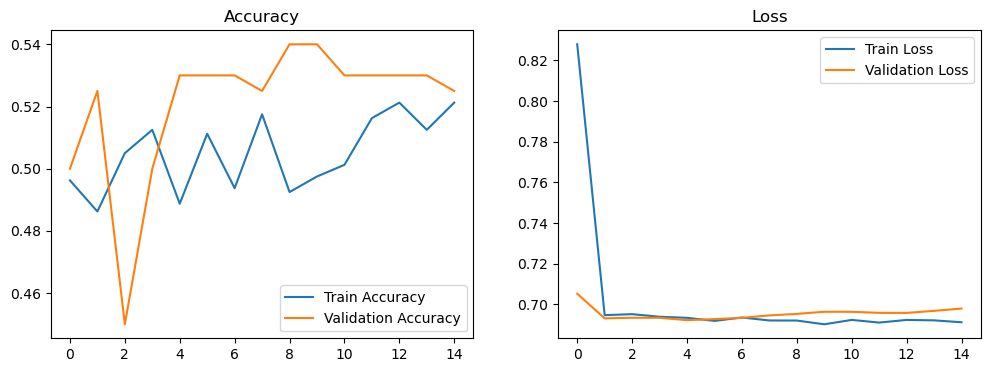

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()

In [49]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = "/home/admin1/Downloads/new_images/validation/unhealthy/image_12608.JPG"  

img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)

if prediction[0][0] >= 0.5:
    print("Prediction: Unhealthy")
else:
    print("Prediction: Healthy")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Prediction: Unhealthy


In [51]:
# Final training accuracy
train_acc = history.history['accuracy'][-1]
print("Final Training Accuracy: {:.2f}%".format(train_acc * 100))

# Final validation accuracy
val_acc = history.history['val_accuracy'][-1]
print("Final Validation Accuracy: {:.2f}%".format(val_acc * 100))

Final Training Accuracy: 52.13%
Final Validation Accuracy: 52.50%
